In [1]:
#==================================
# 1️⃣ Improtar la librería de Pandas
#==================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#==================================
# 2️⃣ Cargar los archivos CSV
#==================================
# Usamos pd.read_csv
ventas_df = pd.read_csv("ventas.csv")
inventarios_df = pd.read_csv("inventarios.csv")
satisfaccion_df = pd.read_csv("satisfaccion.csv")

In [3]:
#==================================
# Limpiar Datos (Eliminar filas con valores nulos)
#==================================
ventas_df = ventas_df.dropna()
inventarios_df = inventarios_df.dropna()
satisfaccion_df = satisfaccion_df.dropna()


In [5]:
#==================================
# Análisis de ventas totales
#==================================
ventas_df["Ventas_Totales"] = ventas_df ["Cantidad_Vendida"] * ventas_df["Precio_Unitario"]
print(ventas_df)
print ("===Ventas Totales===")
ventas_totales = ventas_df.groupby("ID_Tienda")["Ventas_Totales"].sum().reset_index()
print (ventas_totales)

   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_Totales  
0            2000  
1            3000  
2            3000  
3            7500  
4            1000  
5            8000  
6           10500  
7            2

In [6]:
#==================================
# Rotación de Inventarios
#==================================
ventas_inventarios = pd.merge(ventas_df,inventarios_df, on = ["ID_Tienda","Producto"], how = "inner")
#==================================
# merge combilas las filas de ambos DF
# on = ["ID_Tienda", "Producto"] Clave de Union obligatoria que existe en ambos DF
# how = "inner" solo conserva las filas que tienen coincidencias en ambos
#==================================
print ("===================Ventas de Inventario==================")
print (ventas_inventarios)
ventas_inventarios["Rotación_inventario"] = ((ventas_inventarios["Cantidad_Vendida"]*100)//ventas_inventarios["Stock_Disponible"])
print (ventas_inventarios)

#==================================
# Rotación de Inventarios por tienda
#==================================

print ("===Rotación mínima de inventarios por producto===")
print (ventas_inventarios["Rotación_inventario"] <= 10)
rot_ventas = ventas_inventarios.groupby("ID_Tienda")["Rotación_inventario"].min().reset_index()
# Se filtra por el producto menos vendido de cada tienda, atendiendo a la pregunta
rot_ventas = rot_ventas["Rotación_inventario"] <= 10
print ("===Tiendas con rotación insuficiente===")
print (rot_ventas)


===================Ventas de Inventario==================
   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_Totales  Stock_Disponible Fecha_Actualización  
0            2000                50          2023-01-05  


In [7]:
#==================================
# Analizar la satisfacción del cliente y filtrar las tiendas con una satisfacción menor al 60%.
#==================================
# Agregar columna de verificación de meta de satisfacción a satisfaccion_df
satisfaccion_df["Meta_satisfacción"] = satisfaccion_df["Satisfacción_Promedio"] >= 60
print (satisfaccion_df)

   ID_Tienda  Satisfacción_Promedio Fecha_Evaluación  Meta_satisfacción
0          1                     85       2023-01-15               True
1          2                     90       2023-01-15               True
2          3                     70       2023-01-15               True
3          4                     65       2023-01-15               True
4          5                     55       2023-01-15              False


In [8]:
#==================================
## Realizar cálculos numéricos con Numpy:
#==================================
# Calcular la mediana de las ventas totales.
print (f"la mediana de las ventas totales es: {int(np.median(ventas_df["Ventas_Totales"]))}")

# Calcular la desviación estándar de las ventas.
print (f"La desviación standard de las ventas totales es: {int(np.std(ventas_df["Ventas_Totales"]))}")


la mediana de las ventas totales es: 3500
La desviación standard de las ventas totales es: 3189


Empty DataFrame
Columns: [ID_Tienda, Producto, Cantidad_Vendida, Precio_Unitario, Ventas_Totales, Fecha_Venta]
Index: []
   ID_Tienda    Producto Cantidad_Vendida Precio_Unitario Ventas_Totales  \
0          5  Producto C               25             300           7500   
1          5  Producto C               34             300          10200   
2          2  Producto A               30             100           3000   
3          3  Producto B               26             200           5200   
4          4  Producto A               30             100           3000   
..       ...         ...              ...             ...            ...   
95         2  Producto C             8576             300        2572800   
96         5  Producto C             9448             300        2834400   
97         4  Producto C            10381             300        3114300   
98         1  Producto A            11409             100        1140900   
99         3  Producto A            12552  

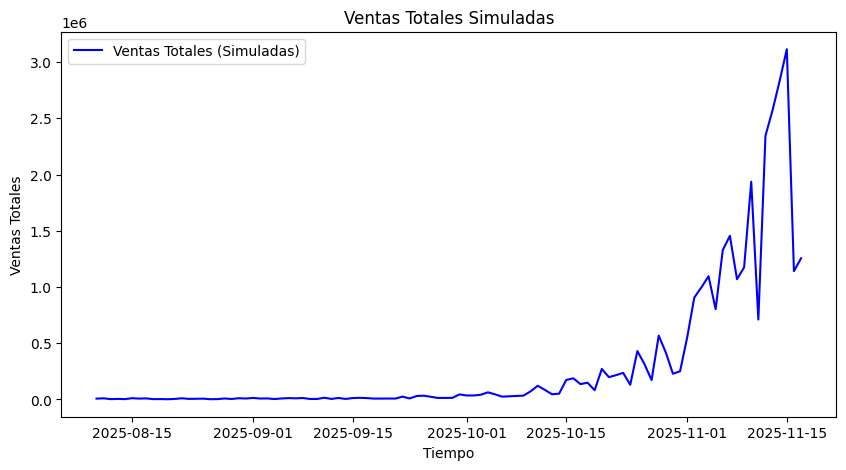

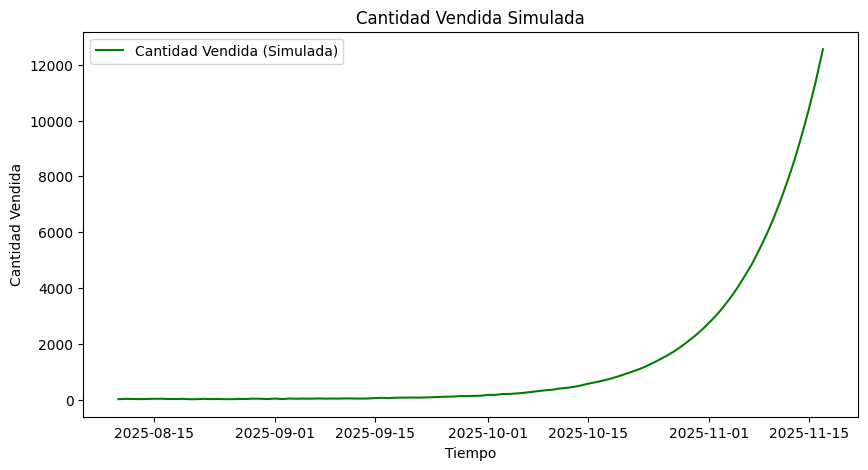

In [9]:
# Simular proyecciones de ventas futuras usando arrays aleatorios de Numpy.
Simulacion_ventas = {
    "ID_Tienda": pd.Series (),
    "Producto": pd.Series (),
    "Cantidad_Vendida": pd.Series (),
    "Precio_Unitario": pd.Series (),
    "Ventas_Totales": pd.Series (),
    "Fecha_Venta": pd.Series (),
    }
df = pd.DataFrame(Simulacion_ventas)
print (df)
tipo = int(input("Defina el tipo de simulación que desea realizar (Pesimista: 1, Continua: 2, Optimista: 3 Exponencial: 4): "))
simulaciones = int(input("\n Escriba La cantidad de datos que desea simular: "))
for i in range(simulaciones):
    df.loc[i, "ID_Tienda"] = np.random.randint(1, 6)
    df.loc[i, "Producto"] = np.random.choice(["Producto A", "Producto B", "Producto C"])
    if df.loc[i, "Producto"] == "Producto A":
        df.loc[i, "Precio_Unitario"] = 100
    elif df.loc[i, "Producto"] == "Producto B":
        df.loc[i, "Precio_Unitario"] = 200
    elif df.loc[i, "Producto"] == "Producto C":
        df.loc[i, "Precio_Unitario"] = 300
    if tipo == 1:
        df.loc[i, "Cantidad_Vendida"] = int(np.random.randint((20 - (i//2)),(40 - (i//2))))
        if i > 15:
            upper = max(1, 40 - (i//2))
            df.loc[i, "Cantidad_Vendida"] = int(np.random.randint(0, upper))
            if i >= 80:
                df.loc[i, "Cantidad_Vendida"] = 0
    elif tipo == 2:
        df.loc[i, "Cantidad_Vendida"] = int(np.random.randint(15,40))
    elif tipo == 3:
        df.loc[i, "Cantidad_Vendida"] = int(np.random.randint((20 + i),(40 + i)))
    elif tipo == 4:
        min_val = int(np.trunc(20 + np.power(1.1, i)))
        max_val = int(np.trunc(40 + np.power(1.1, i)))
        if max_val > min_val:
            df.loc[i, "Cantidad_Vendida"] = int(np.random.randint(min_val, max_val))
        else:
            df.loc[i, "Cantidad_Vendida"] = min_val
    else:
        print ("Se seleccionó un tipo de simulación invalido")

    df.loc[i, "Fecha_Venta"] = (pd.to_datetime("2025-08-10") + pd.Timedelta(days=i)).strftime("%Y-%m-%d")
df["Ventas_Totales"] = df["Cantidad_Vendida"] * df["Precio_Unitario"]
print(df)

# Crear el eje de tiempo (puede ser el índice o la columna Fecha_Venta)
# Gráfica independiente de Ventas Totales (Simuladas)
# Crear el eje de tiempo y los datos de ventas totales simuladas a partir de df
tiempo_df = pd.to_datetime(df["Fecha_Venta"])
ventas_totales_df = pd.to_numeric(df["Ventas_Totales"], errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(tiempo_df, ventas_totales_df, label="Ventas Totales (Simuladas)", color='blue')
plt.xlabel("Tiempo")
plt.ylabel("Ventas Totales")
plt.title("Ventas Totales Simuladas")
plt.legend()
plt.show()

# Gráfica independiente de Cantidad Vendida (Simulada)
tiempo_df = pd.to_datetime(df["Fecha_Venta"])
cantidad_vendida_df = pd.to_numeric(df["Cantidad_Vendida"], errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(tiempo_df, cantidad_vendida_df, label="Cantidad Vendida (Simulada)", color='green')
plt.xlabel("Tiempo")
plt.ylabel("Cantidad Vendida")
plt.title("Cantidad Vendida Simulada")
plt.legend()
plt.show()

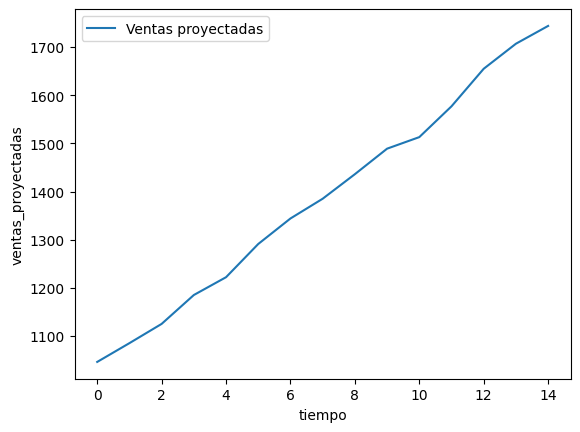

In [10]:
#Generador de puntos ()
tiempo =np. arange(15)
ventas_aleatorias = np.random.randint(10,60,(1,15))


#proyectar las ventas con la tendencia lineal
pendiente = 50
intereseccion = 1000
ventas_proyectadas = pendiente * tiempo + intereseccion + ventas_aleatorias

import matplotlib.pyplot as plt
plt.plot(tiempo, ventas_proyectadas.flatten(), label="Ventas proyectadas")
plt.xlabel("tiempo")
plt.ylabel("ventas_proyectadas")
plt.legend ()
plt.show()
